# Exercise 1
Laboratory Session 06 : May 19, 2022 Exercises due : June 5, 2022  

• a well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease.  
• A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of n = 75 patients known to have the disease is screened using the new method.  
  
(a) what is the probability distribution of y, the number of times the new method fails to detect the disease ?  

_**ANS: The distribution of y follows a Binomial Distribution, this is because it is a binary sucess or failure problem that has a fixed probability of success**_
  
(b) on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is the frequentist estimator of the failure probability of the new method ?  

_**ANS: The frequentists method only uses the newly aquired data. Thus the new failure probability is 6/75 = 8%**_
  
(c) setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance  

_**To find the alpha and beta parameter of the beta function the mean and variance is placed into these equations.**_

\begin{array}{l}
\alpha=\left(\frac{E[X](1-E[X])}{V[X]}-1\right) E[X] \\
\beta=\left(\frac{E[X](1-E[X])}{V[X]}-1\right)(1-E[X])
\end{array}

(d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way.  
  
(e) Perform the same hypothesis test in the classical frequentist way.  


 The area under the posterior should be 1, it is:  1
Expectation is:  0.08478674
Variance is:  0.1359845

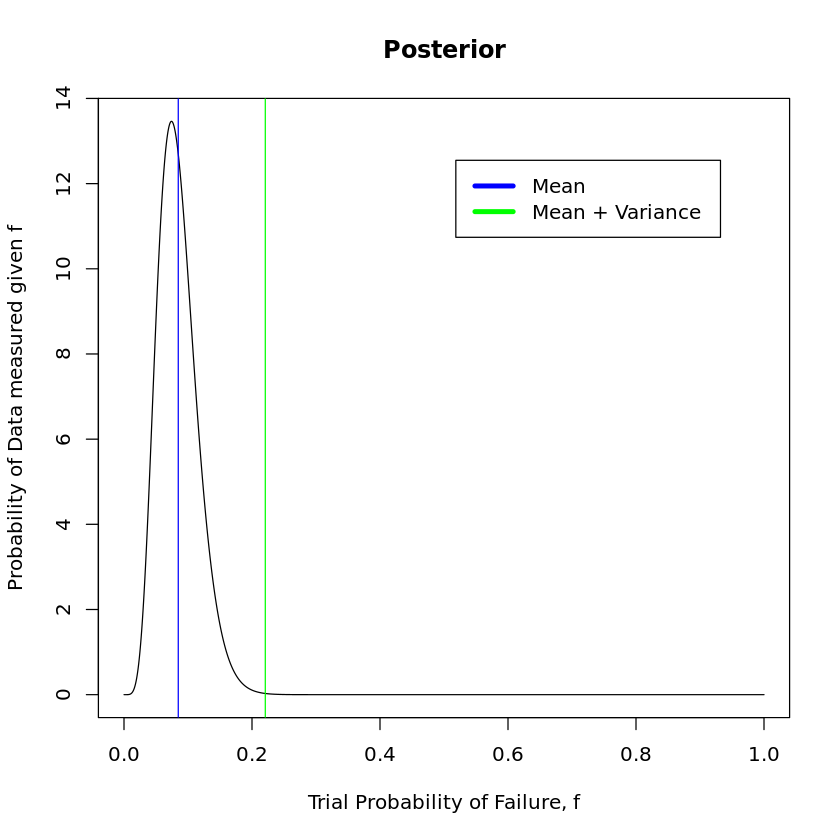

In [1]:
#Ex 1 part c

#P(f)
prior <- function(f){
    mean <- 0.15
    var <- 0.14^2
    alpha <- mean*mean*(1-mean)/var  -  mean
    beta <- mean*(1-mean)*(1-mean)/var  -  (1-mean)
    return(dbeta(f,shape1 = alpha, shape2 = beta))
}
data <- 6
#P(data|f)
likelihood <- function(f){
    dbinom(data,size = 75,prob = f)
}

liXpr <- function(f){
    return(prior(f)*likelihood(f))
}

normC <- integrate(liXpr, lower = 0, upper = 1)

# f is failure probability 
#P(f|data)
posterior <- function(f){
    return((1/normC$value)*prior(f)*likelihood(f))
}

one <- integrate(posterior, lower = 0, upper = 1)
cat('\n The area under the posterior should be 1, it is: ',one$value)

f <- seq(0,1,0.0001)
fPf = function(f){
    return(f*posterior(f))
}

fPf2 <- function(f){
    return(f^2*posterior(f^2))
}

Expf <- integrate(fPf,lower = 0, upper = 1)$value
var <- abs(Expf^2 - integrate(fPf2,lower = 0, upper = 1)$value)

cat('\nExpectation is: ',Expf)
cat('\nVariance is: ',var)
plot(f,posterior(f),type = 'l',main = 'Posterior', xlab = 'Trial Probability of Failure, f',ylab = 'Probability of Data measured given f')
abline(v = Expf, col = 'blue')
abline(v = Expf + var, col = 'green')
legend("topright", 
       inset=0.1, 
       legend=c("Mean","Mean + Variance"),
       col=c("Blue", "Green"), 
       lty=1:1, 
       cex=1,
       box.lty=1,
       lwd = 4)


# d hypothesis test
part d Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way.

#### H1 hypothesis. The new treatment is better than the traditional treatment. ie probability of failure to detect the desease in ill patients is less than 15%.

#### H0 null hypothesis. The new treatment is not better than the traditional treatment. ie probability of failure to detect the desease in ill patients is >= 15%

this is a single sided hypothesis test

f is the probability of failing to detect the disease in ill patients. 

# bayseian test
In a bayseian hypothesis test the posterior probability of the null hypothesis is used. This is the probability the null hypothesis is true given the data.

$$P(H0|data) = P(f\ge0.15 | data) = \int_{0.15}^{1} P(f|data)df$$

$$P(f|data) = \frac{P(data|f) \cdot prior(f)}{normC}$$

$P(f|data)$ is the posterior calculated previously using a beta prior. The posterior of the null hypothesis is this an integral of this from 0.15 to 1.




In [2]:
#ex 1 part d
PH0gD = integrate(posterior, lower = 0.15, upper = 1)$value

cat('\nThe probability that the null hypothesis is true given the data is, ',PH0gD)
cat('\nThis is less than 5%. Thus we reject the null hypotheses given a 5% confidance level.')


The probability that the null hypothesis is true given the data is,  0.03127933
This is less than 5%. Thus we reject the null hypotheses given a 5% confidance level.

# frequentist f-test

In the f-test we are interested in the null distribution. This the the distribution of the test stastic given the null hypothesis is true. If the data meaured is in the rejection region, 5% of the area of the distribution. Then the null hypothesis is rejected.

H0 null hypothesis, $f \ge 0.15$.  
fails <- 0:75 
$$\int_0^r dbinom(x = fails, size = 75, prob = 0.15) dx = 0.05$$
If $data < r$ then we reject the null hypothesis. It is because the data is so far into the tails that it is unlikely the data is sampled from the distribution and thus it is unlikely the probability of failure is 0.15$$

We only use prob = 0.15 because this gives the greatest chance of accepting the null hypothesis. If we accept this null hypothesis then it is also accepted for all values of prob > 0.15.



The data measured is before the rejection marker. Thus we reject the null hypothesis. It is unlikely the data was sampled from this distribution.

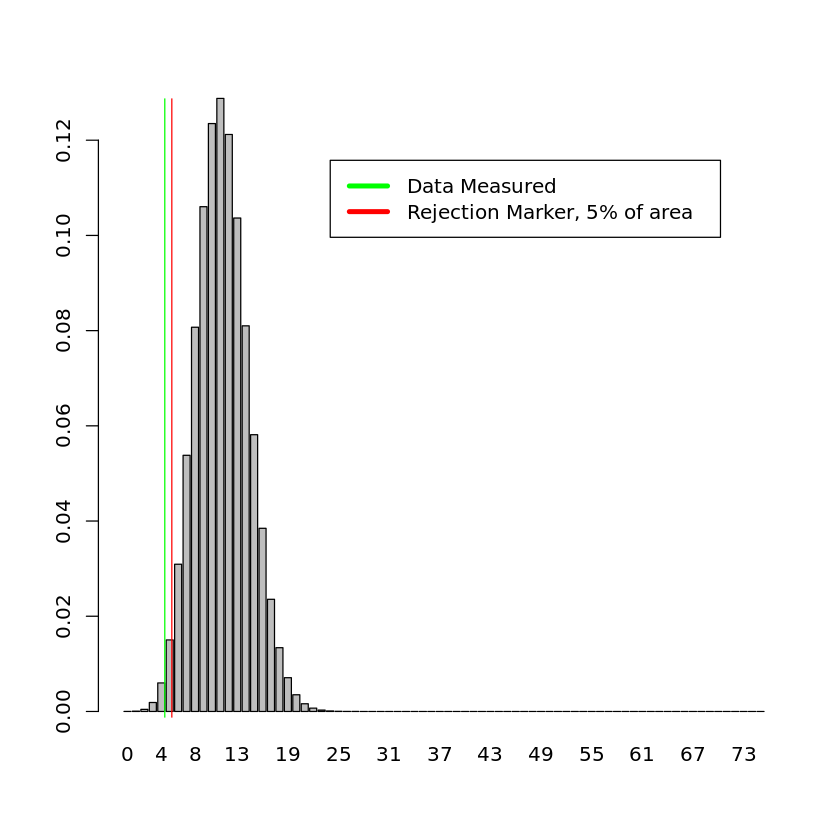

In [3]:
# ex 1 part d
nullDist <- function(f){
    return (dbinom(f,size = 75, prob = 0.15))
}
f <- 0:75
nullDistV <- nullDist(f) 
nullcumsum <- cumsum(nullDistV)
accept1 <- which.min(abs(0.05-nullcumsum))
barplot(nullDistV,names = f)
legend("topright", 
       inset=0.1, 
       legend=c("Data Measured","Rejection Marker, 5% of area"),
       col=c("green", "red"), 
       lty=1:1, 
       cex=1,
       box.lty=1,
       lwd = 4)
abline(v = accept1,col = 'red')
abline(v = 6, col = 'green')


cat('The data measured is before the rejection marker. Thus we reject the null hypothesis. It is unlikely the data was sampled from this distribution.')

# Exercise 2
• Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution.  

• Considering the following to sets of observations taken over a fixed large time interval in two different corps:  

y death soldiers 0 1 2 3 4 ≥ 5 n1 observations 109 65 22 3 1 0 n2 observations 144 91 32 11 2 0
  
(a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.  

 (b) assuming now a Jeffreys’ prior,
√
g(λ)∝1/ λ,withλ>0
compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.


 The normalisation constant is:  4.525902e-228
The posterior should have an area undernieth of one, it is:  1.133875
I believe this is due to errors with small numbers being used that the computer struggles to represent.
The mean is:  0.7535547
The variance is:  0.1058469
The median is:  0.66
The 95% confidence interval goes from  0.593  to  0.706

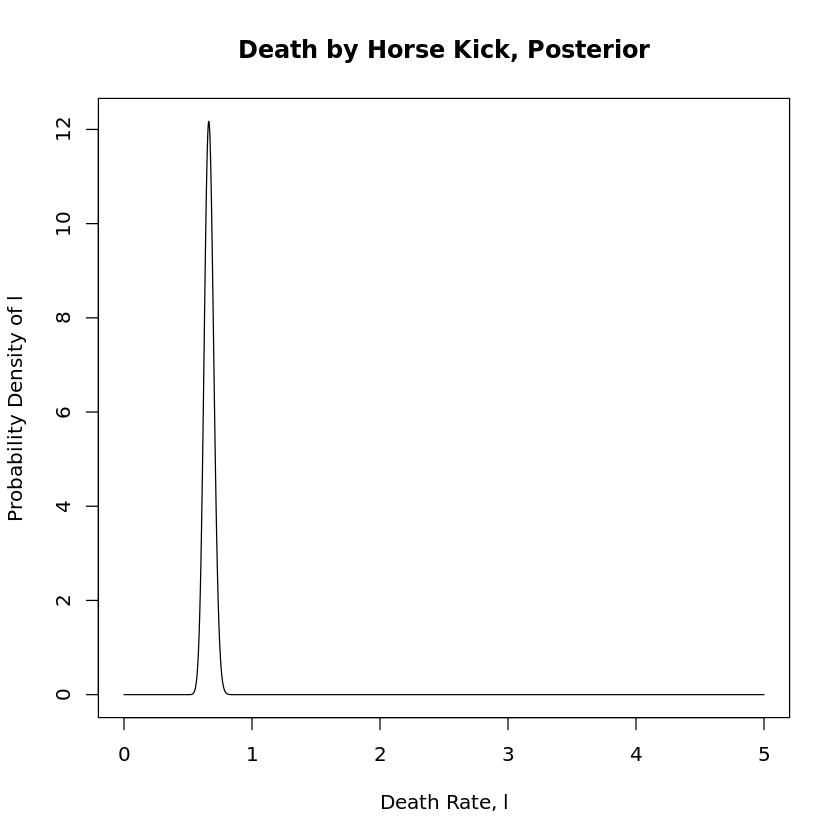

In [11]:
# ex 2 part a
nDeath <- c(0,1,2,3,4,5)
corp1 <- c(109,65,22,3,1,0)
corp2 <- c(144,91,32,11,2,0)
data <- corp1 + corp2
# cat(total)
#uniform prior means the prior is taken into account in the normalisation constant

#P(data|l), where l is deathrate 
likelihood <- function(l){
    probData <- 1
    for(i in 1:6){
        probData <- probData * dpois(nDeath[i],lambda = l)^data[i]
    }
    return(probData)
}

l <- seq(0,5,0.001)
normC <- integrate(likelihood, lower = 0, upper = 5)$value
cat('\n The normalisation constant is: ',normC)

posterior <- function(l){
    normC^-1 * likelihood(l)
}

plot(l,posterior(l), type = 'l', main = 'Death by Horse Kick, Posterior', xlab = 'Death Rate, l',ylab = 'Probability Density of l')

cat('\nThe posterior should have an area undernieth of one, it is: ', integrate(posterior, lower = 0, upper = 5)$value)
cat('\nI believe this is due to errors with small numbers being used that the computer struggles to represent.')

lPl <- function(l){
    return(l*posterior(l))
}

l2Pl2 <- function(l){
    return(l^2*posterior(l^2))
}

quantile <- function(q,fun){
    area <- 0
    deathrate <- 0.001
    while(area < q){
        area <- integrate(fun,lower = 0, upper = deathrate)$value
        deathrate <- deathrate + 0.001
    }
    return(deathrate)
}

mean <- integrate(lPl, lower = 0, upper = 5)$value
cat('\nThe mean is: ',mean)

var <- abs(mean^2 - integrate(l2Pl2,lower = 0, upper = 5)$value)
cat('\nThe variance is: ',var)

median <- quantile(0.5,posterior)
cat('\nThe median is: ', median)

lc <- quantile(0.025,posterior)
uc <- quantile(0.975,posterior)
cat('\nThe 95% confidence interval goes from ',lc,' to ',uc)






 The normalisation constant is:  5.383438e-228
The posterior should have an area undernieth of one, it is:  1.170704
I believe this is due to errors with small numbers being used that the computer struggles to represent.
The mean is:  0.7768109
The variance is:  0.1268058
The median is:  0.658
The 95% confidence interval goes from  0.592  to  0.701

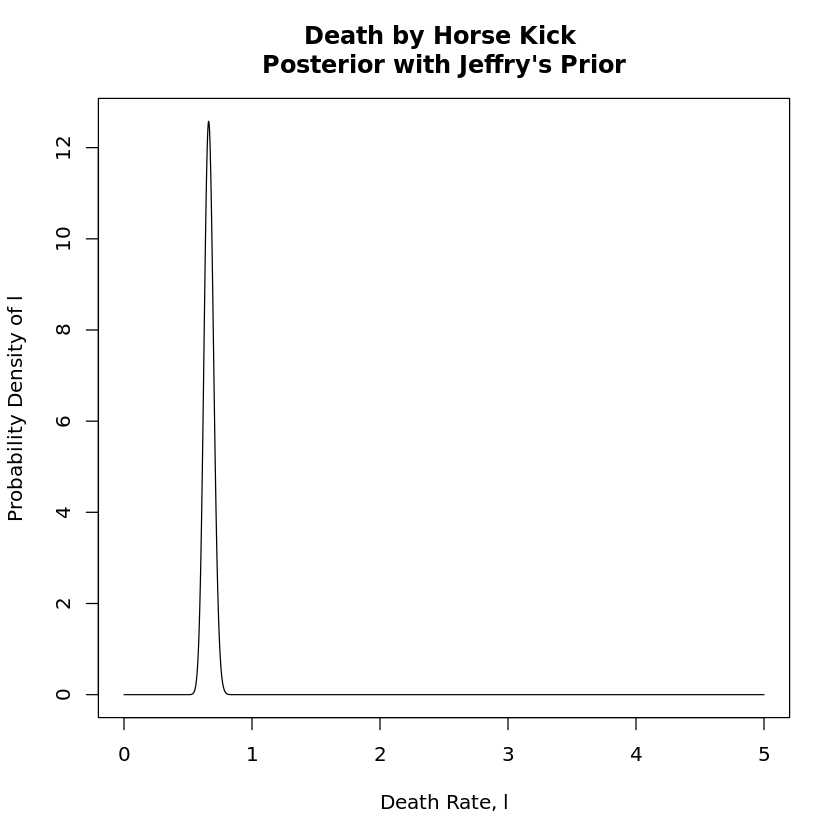

In [44]:
# ex 2 part b
#with jeffories prior
jeff <- function(l){
    return(1/sqrt(l))
}

nDeath <- c(0,1,2,3,4,5)
corp1 <- c(109,65,22,3,1,0)
corp2 <- c(144,91,32,11,2,0)
data <- corp1 + corp2
# cat(total)
#uniform prior means the prior is taken into account in the normalisation constant

#P(data|l), where l is deathrate 
likelihoodjeff <- function(l){
    probData <- 1
    for(i in 1:6){
        probData <- probData * dpois(nDeath[i],lambda = l)^data[i]
    }
    return(jeff(l)*probData)
}

l <- seq(0,5,0.001)
normC <- integrate(likelihoodjeff, lower = 0, upper = 5)$value
cat('\n The normalisation constant is: ',normC)

posteriorjeff <- function(l){
    normC^-1 * likelihoodjeff(l)
}

plot(l,posteriorjeff(l), type = 'l', main = "Death by Horse Kick \nPosterior with Jeffry's Prior", xlab = 'Death Rate, l',ylab = 'Probability Density of l')

cat('\nThe posterior should have an area undernieth of one, it is: ', integrate(posteriorjeff, lower = 0, upper = 5)$value)
cat('\nI believe this is due to errors with small numbers being used that the computer struggles to represent.')

lPl <- function(l){
    return(l*posteriorjeff(l))
}

l2Pl2 <- function(l){
    return(l^2*posteriorjeff(l^2))
}

quantile <- function(q,fun){
    area <- 0
    deathrate <- 0.001
    while(area < q){
        area <- integrate(fun,lower = 0, upper = deathrate)$value
        deathrate <- deathrate + 0.001
    }
    return(deathrate)
}

mean <- integrate(lPl, lower = 0, upper = 5)$value
cat('\nThe mean is: ',mean)

var <- abs(mean^2 - integrate(l2Pl2,lower = 0, upper = 5)$value)
cat('\nThe variance is: ',var)

median <- quantile(0.5,posteriorjeff)
cat('\nThe median is: ', median)

lc <- quantile(0.025,posteriorjeff)
uc <- quantile(0.975,posteriorjeff)
cat('\nThe 95% confidence interval goes from ',lc,' to ',uc)

# Exercise 3
• A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. n = 116 samples were taken from streams having a high environmental impact on pandas. Out of these, y = 11 had a high bacter X level.  

• indicating with p the probability that a sample of water taken from the stream has a high bacter X level,  

(a) find the frequentist estimator for p

**_ANS: The frequentist estimation of p is, 11/116 = 0.094_**

(b) using a Beta(1,10) prior for p, calculate and posterior distribution P(p | y)  

(c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval  

(d) test the hypotesis  

$$H◦ : p=0.1$$
$$H_1 :p \ne 0.1$$  
at 5% level of significance with both the frequentist and bayesian approach  

• a new measurement, performed one month later on n = 165 water samples, gives y = 9 high bacter X level  
(e) find the frequentist estimator for p  
(f) find a bayesian estimator for p, assuming both a Beta(1,10) prior for p, and assuming the posterior
probability of the older measurement as the prior for the new one.  

(g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval 

(h) test the hypotesis  
$$H◦ : p=0.1$$
$$H_1 :p \ne 0.1$$  

at 5% level of significance with both the frequentist and bayesian approach  

normc 0.03364405
ex 3 part c
 The area under the posterior should be 1, it is:  1
Expectation is:  0.09448819
Variance is:  0.1433242
The bayseian estimation of f is,  0.088 . This is based on the value of f that gives the max likelihood.
The 95% confidence interval goes from  0.052  to  0.152

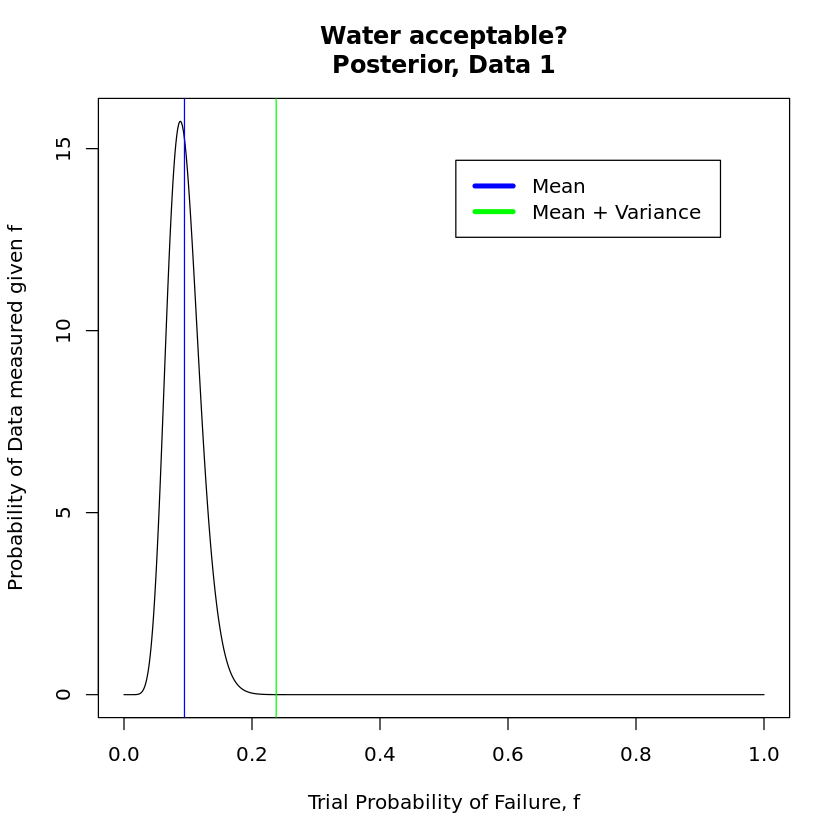

In [19]:
# ex 3 part b and c
# f is the probability of a high bacteria level
#P(f)
prior <- function(f){
    return(dbeta(f,shape1 = 1, shape2 = 10))
}
data <- 11
#P(data|f)
likelihood <- function(f){
    dbinom(data,size = 116,prob = f)
}

liXpr <- function(f){
    return(prior(f)*likelihood(f))
}

normC <- integrate(liXpr, lower = 0, upper = 1)
cat('normc',normC$value)
# f is failure probability 
#P(f|data)

posterior <- function(f){
    return((1/normC$value)*prior(f)*likelihood(f))
}

one <- integrate(posterior1, lower = 0, upper = 1)
cat('\nex 3 part c')
cat('\n The area under the posterior should be 1, it is: ',one$value)

f <- seq(0,1,0.0001)
fPf = function(f){
    return(f*posterior(f))
}

fPf2 <- function(f){
    return(f^2*posterior(f^2))
}

Expf <- integrate(fPf,lower = 0, upper = 1)$value
var <- abs(Expf^2 - integrate(fPf2,lower = 0, upper = 1)$value)

cat('\nExpectation is: ',Expf)
cat('\nVariance is: ',var)
plot(f,posterior(f),type = 'l',main = 'Water acceptable?\nPosterior, Data 1', xlab = 'Trial Probability of Failure, f',ylab = 'Probability of Data measured given f')
abline(v = Expf, col = 'blue')
abline(v = Expf + var, col = 'green')
legend("topright", 
       inset=0.1, 
       legend=c("Mean","Mean + Variance"),
       col=c("Blue", "Green"), 
       lty=1:1, 
       cex=1,
       box.lty=1,
       lwd = 4)

posteriorV <- posterior(f)
cat('\nThe bayseian estimation of f is, ', f[which.max(posteriorV)],'. This is based on the value of f that gives the max likelihood.')

lc <- quantile(0.025,posterior)
uc <- quantile(0.975,posterior)
cat('\nThe 95% confidence interval goes from ',lc,' to ',uc)

# hypothesis testing
(d) test the hypotesis  

$$H◦ : p=0.1$$
$$H_1 :p \ne 0.1$$  
at 5% level of significance with both the frequentist and bayesian approach  

### frequentist approach, f-test
In the frequentist approach we use the null distribution. This is the sampling distribution given the null hypothesis is true. In this case it is a binomial distribution with a probability = 0.1 and size = 116.

If the data collected is unlikely to have been sampled from this distribution then we reject the null hypothesis. It is said to be unlikely if it resides deep into the tails of the distribution. A significance of 5% means each reject tail has 5% of the area of the distribution.


The lower acceptance line is at 7 samples. This has a true area before of:  0.04840562
The upper acceptance line is at 18 samples. This has a true area after of:  0.04005376
The data measured is within the rejection markers. Thus we accept the null hypothesis. It is likely the data was sampled from this distribution.

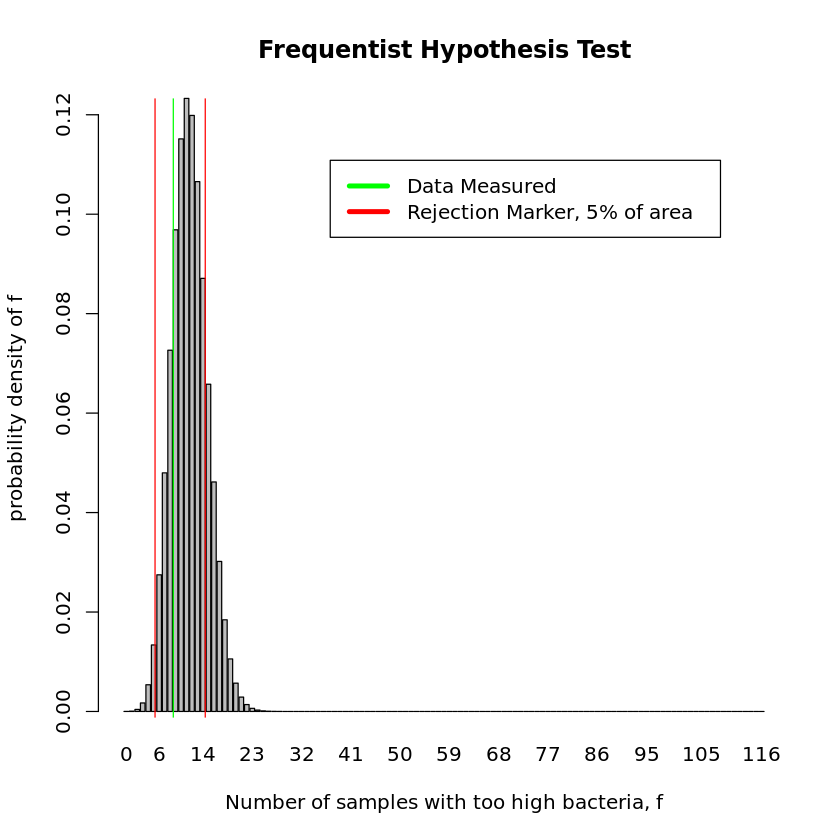

In [7]:
# ex 3 part d
nullDist <- function(f){
    return (dbinom(f,size = 116, prob = 0.1))
}
f <- 0:116
nullDistV <- nullDist(f) 
nullcumsum <- cumsum(nullDistV)

accept1 <- which.min(abs(0.05-nullcumsum))
accept2 <- which.min(abs(0.95-nullcumsum))

barplot(nullDistV,names = f, main = 'Frequentist Hypothesis Test',
        xlab = 'Number of samples with too high bacteria, f',ylab = 'probability density of f')
legend("topright", 
       inset=0.1, 
       legend=c("Data Measured","Rejection Marker, 5% of area"),
       col=c("green", "red"), 
       lty=1:1, 
       cex=1,
       box.lty=1,
       lwd = 4)
abline(v = accept1,col = 'red')
abline(v = 11, col = 'green')
abline(v = accept2, col = 'red')
cat('\nThe lower acceptance line is at',accept1,'samples. This has a true area before of: ',nullcumsum[accept1])
cat('\nThe upper acceptance line is at',accept2,'samples. This has a true area after of: ',1-nullcumsum[accept2])

cat('\nThe data measured is within the rejection markers. Thus we accept the null hypothesis. It is likely the data was sampled from this distribution.')

### Bayesian hypothesis testing

**This is my attempt. I had an issue where I could not evaluate the probability of the null hypothesis, p=0.1, because the posterior of p is a *continuous* probability density distribution. I could find the probability it is within 0.09 and 0.11 but not exactly 0.1. This is because at exactly exactly this value there is no width to the slice and the probability of it being exactly 0.1 is infinitesemal**

In the bayseing approach the posterior null hypothesis is calculated. 

$$P(H0 | data) = \frac {P(data | H0) \cdot P(H0)}{P(data)}$$
A uniform prior is used so P(H0) is a constant. P(data) is always constant.  
H0 is p = 0.1

The posterior P(p|data) was calcualted previously. To find P(p=0.1|data) we simply take the value of the posterior at p = 0.1.

If this probability is less than 0.05 then we reject the null hypothesis. 

In [27]:
#ex 3 part d
cat('P(p=0.1|data) = ',posterior(0.1))

P(p=0.1|data) =  1.610195

• a new measurement, performed one month later on n = 165 water samples, gives y = 9 high bacter X level  
(e) find the frequentist estimator for p

**_ANS: The frequentist estimator does not take into account the previous data and so the estimation of p is simply 9/165 = 0.0545..._**
 
(f) find a bayesian estimator for p, assuming both a Beta(1,10) prior for p, and assuming the posterior
probability of the older measurement as the prior for the new one.  

(g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval 

(h) test the hypotesis  
$$H◦ : p=0.1$$
$$H_1 :p \ne 0.1$$  

at 5% level of significance with both the frequentist and bayesian approach  

normc 0.03501892
ex 3 part c
 The area under the posterior should be 1, it is:  0.9607393
Expectation is:  0.05681818
Variance is:  0.1145582
The bayseian estimation of f is,  0.0517 . This is based on the value of f that gives the max likelihood.
The 95% confidence interval goes from  0.029  to  0.097

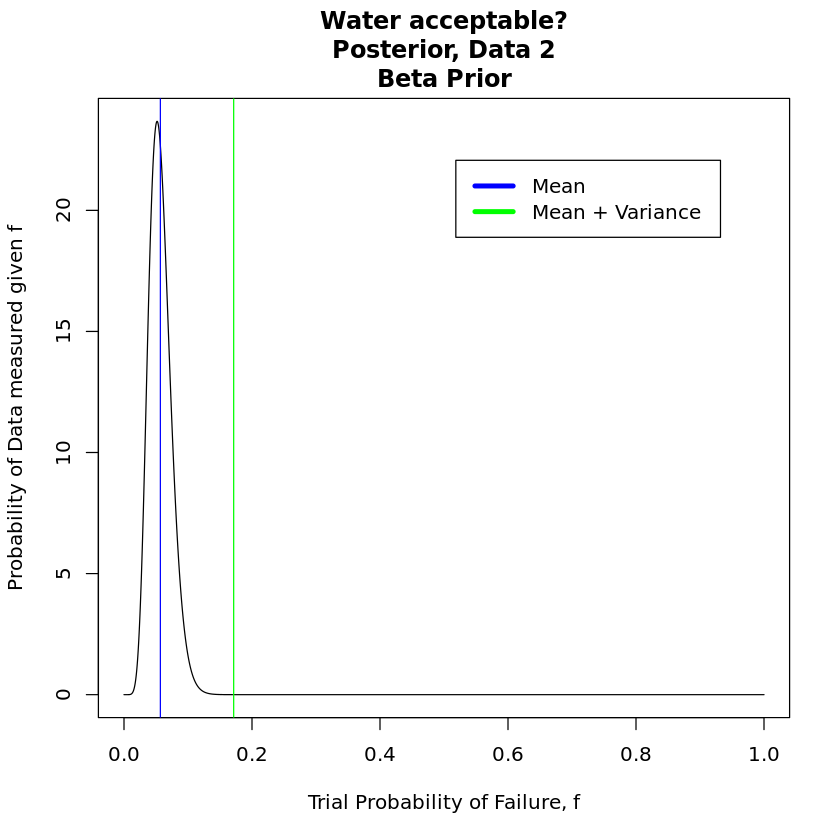

In [23]:
#ex 3 part f
# f is the probability of a high bacteria level
#P(f)
prior <- function(f){
    return(dbeta(f,shape1 = 1, shape2 = 10))
}
data <- 9
#P(data|f)
likelihood <- function(f){
    dbinom(data,size = 165,prob = f)
}

liXpr <- function(f){
    return(prior(f)*likelihood(f))
}

normC <- integrate(liXpr, lower = 0, upper = 1)
cat('normc',normC$value)
# f is failure probability 
#P(f|data)

posterior <- function(f){
    return((1/normC$value)*prior(f)*likelihood(f))
}

one <- integrate(posterior1, lower = 0, upper = 1)
cat('\nex 3 part c')
cat('\n The area under the posterior should be 1, it is: ',one$value)

f <- seq(0,1,0.0001)
fPf = function(f){
    return(f*posterior(f))
}

fPf2 <- function(f){
    return(f^2*posterior(f^2))
}

Expf <- integrate(fPf,lower = 0, upper = 1)$value
var <- abs(Expf^2 - integrate(fPf2,lower = 0, upper = 1)$value)

cat('\nExpectation is: ',Expf)
cat('\nVariance is: ',var)
plot(f,posterior(f),type = 'l',main = 'Water acceptable?\nPosterior, Data 2\nBeta Prior', xlab = 'Trial Probability of Failure, f',ylab = 'Probability of Data measured given f')
abline(v = Expf, col = 'blue')
abline(v = Expf + var, col = 'green')
legend("topright", 
       inset=0.1, 
       legend=c("Mean","Mean + Variance"),
       col=c("Blue", "Green"), 
       lty=1:1, 
       cex=1,
       box.lty=1,
       lwd = 4)

posteriorV <- posterior(f)
cat('\nThe bayseian estimation of f is, ', f[which.max(posteriorV)],'. This is based on the value of f that gives the max likelihood.')

lc <- quantile(0.025,posterior)
uc <- quantile(0.975,posterior)
cat('\nThe 95% confidence interval goes from ',lc,' to ',uc)


ex 3 part c
 The area under the posterior should be 1, it is:  1
Expectation is:  0.06506849
Variance is:  0.1225267
The bayseian estimation of f is,  0.0621 . This is based on the value of f that gives the max likelihood.
The 95% confidence interval goes from  0.041  to  0.097

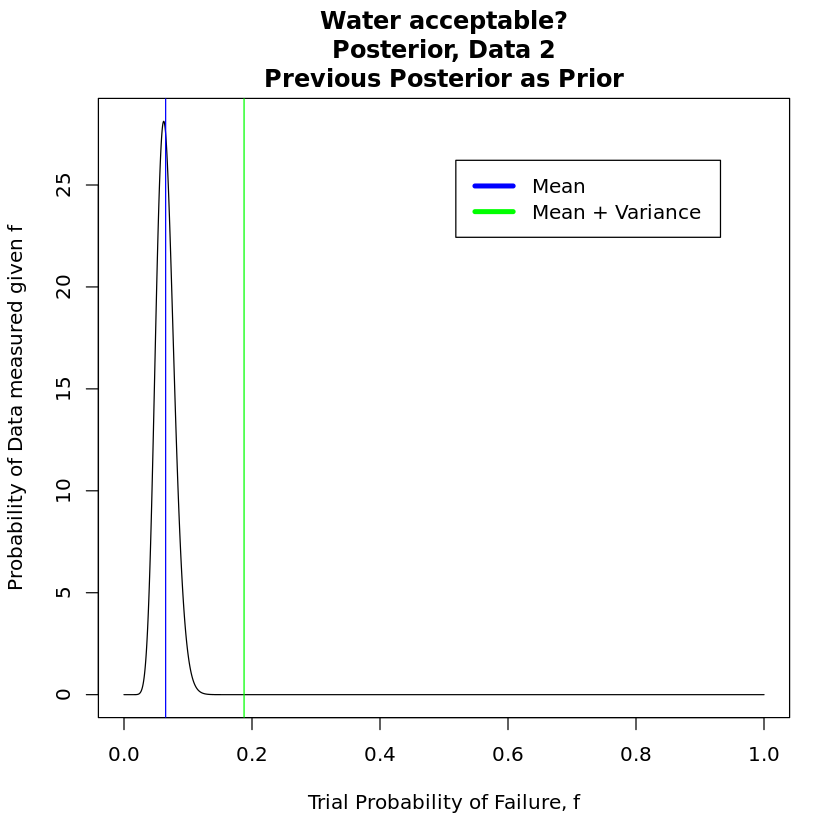

In [22]:
#Ex 3 part f Using the previous posterior as a prior

# f is the probability of a high bacteria level
#P(f)
prevPosterior <- function(f){
    return((1/0.03364405)*dbeta(f,shape1 = 1, shape2 = 10)*dbinom(data,size = 116,prob = f))
}

data <- 9
#P(data|f)
likelihood <- function(f){
    dbinom(data,size = 165,prob = f)
}

liXpr <- function(f){
    return(prevPosterior(f)*likelihood(f))
}

normC <- integrate(liXpr, lower = 0, upper = 1)

# f is failure probability 
#P(f|data)
posterior2 <- function(f){
    return((1/normC$value)*prevPosterior(f)*likelihood(f))
}

one <- integrate(posterior2, lower = 0, upper = 1)
cat('\nex 3 part c')
cat('\n The area under the posterior should be 1, it is: ',one$value)

f <- seq(0,1,0.0001)
fPf = function(f){
    return(f*posterior2(f))
}

fPf2 <- function(f){
    return(f^2*posterior2(f^2))
}

Expf <- integrate(fPf,lower = 0, upper = 1)$value
var <- abs(Expf^2 - integrate(fPf2,lower = 0, upper = 1)$value)

cat('\nExpectation is: ',Expf)
cat('\nVariance is: ',var)
plot(f,posterior2(f),type = 'l',main = 'Water acceptable?\nPosterior, Data 2\nPrevious Posterior as Prior', xlab = 'Trial Probability of Failure, f',ylab = 'Probability of Data measured given f')
abline(v = Expf, col = 'blue')
abline(v = Expf + var, col = 'green')
legend("topright", 
       inset=0.1, 
       legend=c("Mean","Mean + Variance"),
       col=c("Blue", "Green"), 
       lty=1:1, 
       cex=1,
       box.lty=1,
       lwd = 4)

posterior2V <- posterior2(f)
cat('\nThe bayseian estimation of f is, ', f[which.max(posterior2V)],'. This is based on the value of f that gives the max likelihood.')

lc <- quantile(0.025,posterior2)
uc <- quantile(0.975,posterior2)
cat('\nThe 95% confidence interval goes from ',lc,' to ',uc)


## Frequentest f-test on the new data

The same null hypothesis of H0 = 0.1 is used. The same analysis is performed. The new data is inserted.


The lower acceptance line is at 11 samples. This has a true area before of:  0.05268827
The upper acceptance line is at 24 samples. This has a true area after of:  0.03992825
The data measured is outside the rejection markers. Thus we reject the null hypothesis. It is likely the data was not sampled from this distribution.

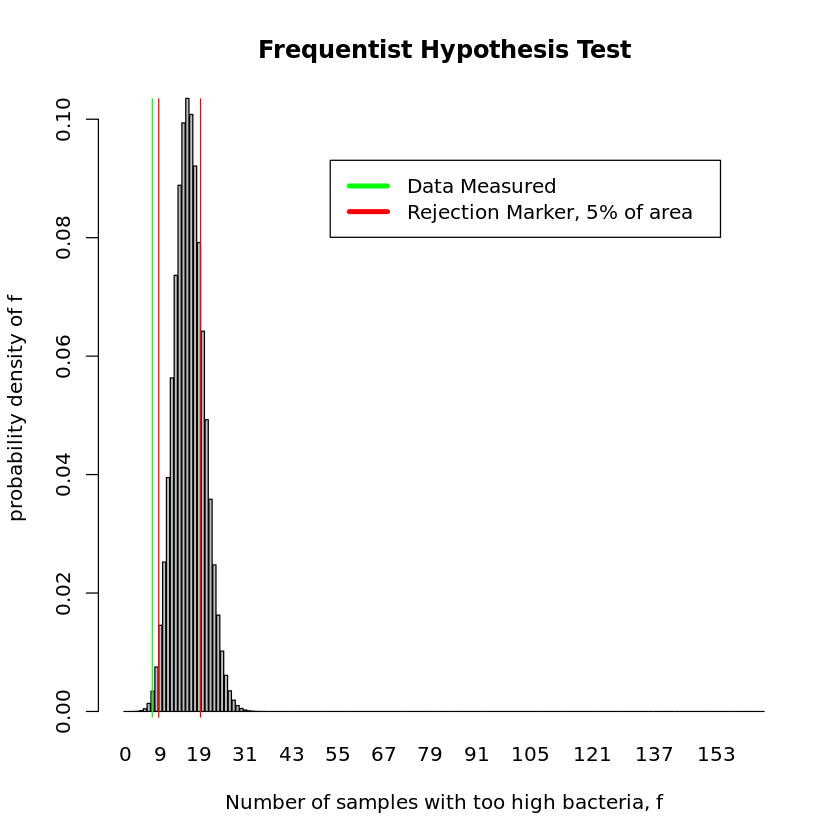

In [26]:
#ex 3 part g
nullDist <- function(f){
    return (dbinom(f,size = 165, prob = 0.1))
}
f <- 0:165
nullDistV <- nullDist(f) 
nullcumsum <- cumsum(nullDistV)

accept1 <- which.min(abs(0.05-nullcumsum))
accept2 <- which.min(abs(0.95-nullcumsum))

barplot(nullDistV,names = f, main = 'Frequentist Hypothesis Test',
        xlab = 'Number of samples with too high bacteria, f',ylab = 'probability density of f')
legend("topright", 
       inset=0.1, 
       legend=c("Data Measured","Rejection Marker, 5% of area"),
       col=c("green", "red"), 
       lty=1:1, 
       cex=1,
       box.lty=1,
       lwd = 4)
abline(v = accept1,col = 'red')
abline(v = 9, col = 'green')
abline(v = accept2, col = 'red')
cat('\nThe lower acceptance line is at',accept1,'samples. This has a true area before of: ',nullcumsum[accept1])
cat('\nThe upper acceptance line is at',accept2,'samples. This has a true area after of: ',1-nullcumsum[accept2])

cat('\nThe data measured is outside the rejection markers. Thus we reject the null hypothesis. It is likely the data was not sampled from this distribution.')

### Bayseian hypothesis testing
This will be applied to the new posterior in the same way it was earlier

In [ ]:
#Ex 3 part g

# Exercise 4

to be solved using a monte carlo markov chain with jags. 

• a well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease.
• A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of n = 75 patients known to have the disease is screened using the new method.

This is known to follow a binomial distribution. Where the total number of trials is 75 and the probability of failure at each trial is unknown. 

**_The study is carried out and it is found that the new method fails to detect the disease 6 times. Thus the frequentist probability of failure is 6/75. I will use this to generate some supposed data collected that will be fed into jags. The jags model is defined so that all the data follows the bernouli process. The probability of failure if given a uniform prior. Jags will use a MCMC to generate the posterior distribution of p._**





In [67]:
#ex 4, jags MCMC
#following the example in the lecture slides I created a data set wchich follows the bernoulii process and simulates the data found in the experiment. 6/75 failed 

X <- rep(0,75)
pos <- sample(1:75,6)
for(i in pos){
    X[i] <- 1
}
cat("The input data, six 1's randomly placed amongs sixty nine 0's\n",X)

data <- NULL
data$X <- X

The input data, six 1's randomly placed amongs sixty nine 0's
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0

my bug file, ex4.bug
```bugs
model {
    # data likelihood
    for (i in 1:length(X)) {
        X[i]  ̃ dbern(p); 
    }
    # a uniform prior for p
    p  ̃ dbeta(1, 1);
}
```

In [6]:
library(rjags)
#creates an r object to represent the model and the data it is applied to.
jm <- jags.model('ex4.bug',data)


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 116
   Unobserved stochastic nodes: 1
   Total graph size: 118

Initializing model



In [7]:
# This initates the burn in period
update(jm,1000)
# This tells the code to sample from the distributions provided with markov chains in order to calculat p.
# The sampling is done 10000 times with no thinning.
chain <- coda.samples(model = jm, variable.names = c("p"), n.iter=10000)
print(summary(chain))


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.1018054      0.0280060      0.0002801      0.0002801 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
0.05354 0.08166 0.09971 0.11951 0.16330 



The plot on the left shows how p changes as it is sampled from the inputed distributions. The plot on the right shows the probability density distribution of the p values sampled. This is the posterior distribution of the parameter.

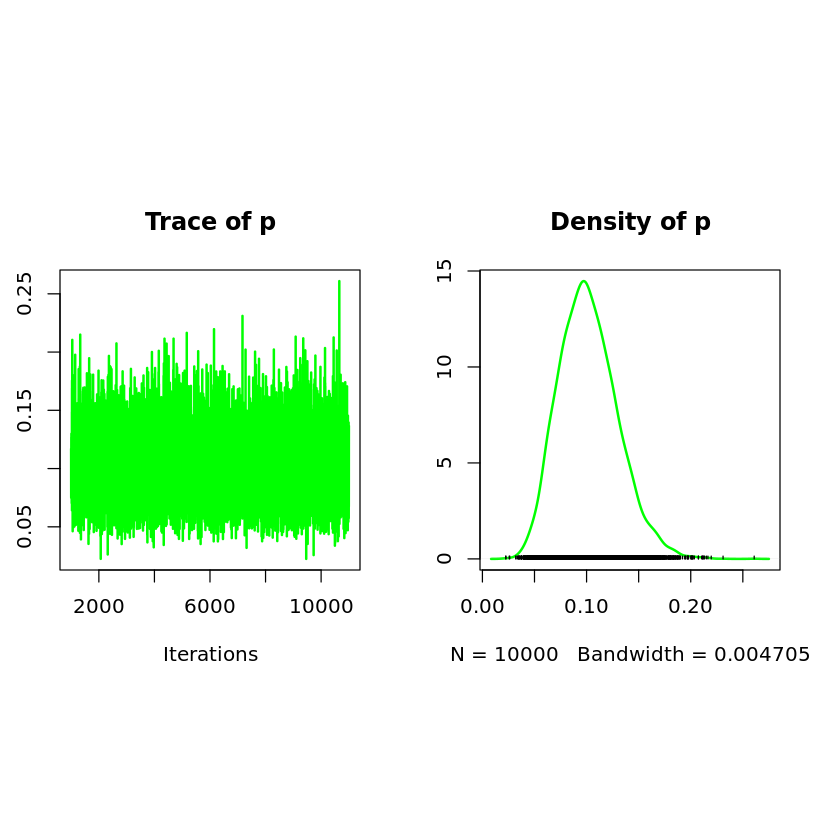

In [8]:
par(pin = c(2.5,2.5))
plot(chain, col = 'green',lwd = 2)

cat('The plot on the left shows how p changes as it is sampled from the inputed distributions. The plot on the right shows the probability density distribution of the p values sampled. This is the posterior distribution of the parameter.')

# Exercise 5

Analyse the data in exercise 2 with a jags MCMC

Exercise 2
• Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution.
  
• Considering the following to sets of observations taken over a fixed large time interval in two different corps:  
y death soldiers 0 1 2 3 4 ≥ 5   
n1 observations 109 65 22 3 1 0   
n2 observations 144 91 32 11 2 0  
  
(a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.  

 (b) assuming now a Jeffreys’ prior,
√
g(λ)∝1/ λ,withλ>0
compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

**_In exercise 2 there were two posterior distributions found. One with a uniform prior and the other with a beta prior. I will use jags to generate these distributions through markov chain sampeling of the likelihood and data distributions. I will show how jags can output the infomation requested about the posterior._**



part a uniform prior

In [46]:
# ex 5 part a
# the data measurements
zero <- rep(0,109+144)
one <- rep(1,65+91)
two <- rep(2,22+32)
three <- rep(3,3+11)
four <- 3

X <- c(zero,one,two,three,four)
X <- sample(X)

data <- NULL
data$X <- X

my bug file, ex5.bug
```bugs
model {
    # data likelihood
    for (i in 1:length(X)) {
        X[i] ~ dpois(lambda); 
    }
    # a uniform prior for lambda
    lambda ~ dexp(0.00001);
}
```

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 478
   Unobserved stochastic nodes: 1
   Total graph size: 480

Initializing model


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.6483764      0.0368380      0.0003684      0.0003684 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.5785 0.6232 0.6478 0.6730 0.7216 

The plot on the left shows how p changes as it is sampled from the inputed distributions. The plot on the right shows the probability density distribution of the p values sampled. This is the posterior distribution of the parameter.

As provided by the chain summary:
 The mean is, 0.6486577
 The median is, 0.6483
 The variance is 0.00133754 
 The 95% confidence

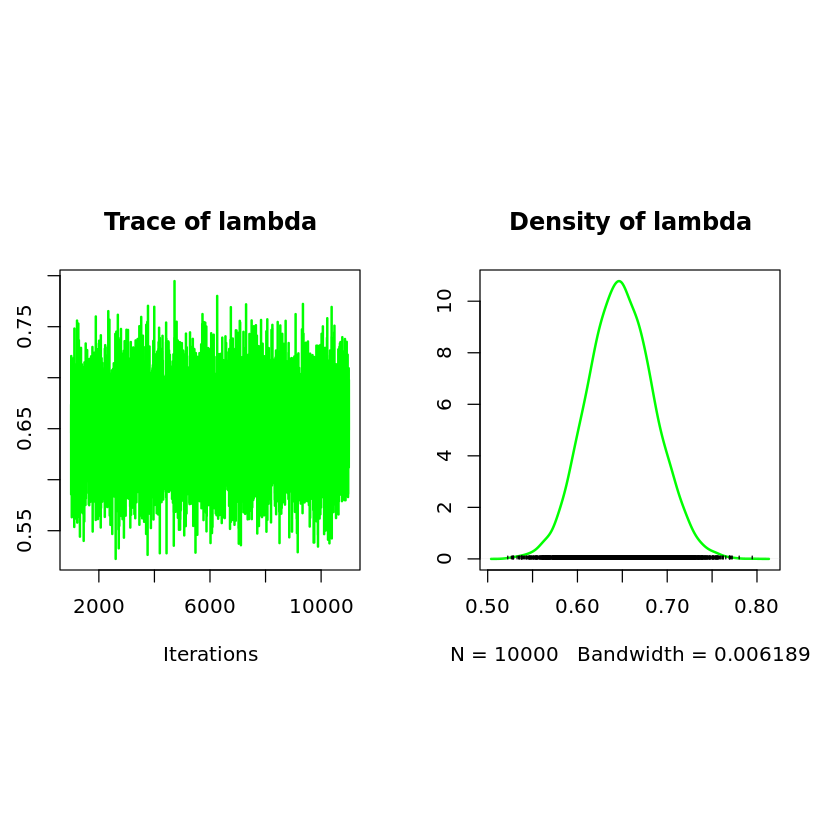

In [47]:
#creates an r object to represent the model and the data it is applied to.
jm <- jags.model('ex5.bug',data)
#This initates the burn in period   
update(jm,1000)
# This tells the code to sample from the distributions provided with markov chains in order to calculat lambda.
# The sampling is done 10000 times with no thinning.
chain <- coda.samples(model = jm, variable.names = c("lambda"), n.iter=10000)
print(summary(chain))

par(pin = c(2.5,2.5))
plot(chain, col = 'green',lwd = 2)

cat('The plot on the left shows how p changes as it is sampled from the inputed distributions. The plot on the right shows the probability density distribution of the p values sampled. This is the posterior distribution of the parameter.')

cat('\n\nAs provided by the chain summary:\n',
    'The mean is, 0.6486577\n',
    'The median is, 0.6483\n',
    'The variance is', 0.0365724^2,'\n',
    'The 95% confidence interval goes from, 0.5775 to 0.7214')

Part b jeffories prior

my bug file, ex5b.bug
```bugs
model {
    # data likelihood
    for (i in 1:length(X)) {
        X[i] ~ dpois(jeff); 
    }
    # jeffry's prior for lambda
    lambda ~ exp(0.00001)
    jeff <- lambda^-2
}
```

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 478
   Unobserved stochastic nodes: 1
   Total graph size: 483

Initializing model


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     1.2470151      0.0360375      0.0003604      0.0003760 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
1.179 1.223 1.246 1.271 1.322 

The plot on the left shows how p changes as it is sampled from the inputed distributions. The plot on the right shows the probability density distribution of the p values sampled. This is the posterior distribution of the parameter.

As provided by the chain summary:
 The mean is, 1.247082
 The median is, 1.247
 The variance is 0.001289025 
 The 95% confidence interval g

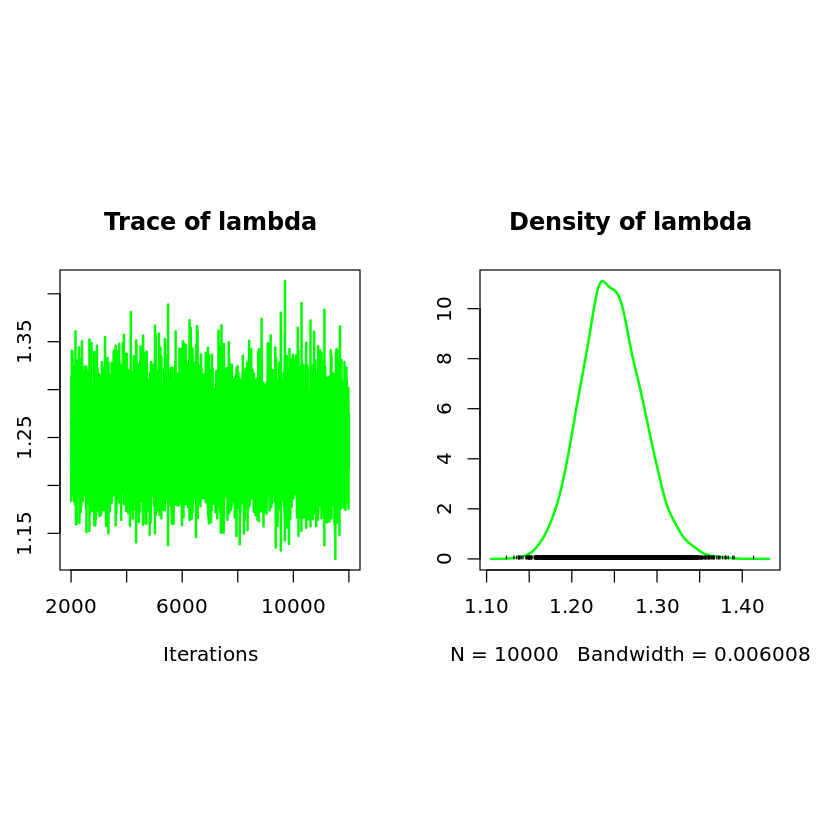

In [50]:
#ex 5 part b
#creates an r object to represent the model and the data it is applied to.
jm <- jags.model('ex5b.bug',data)
#This initates the burn in period
update(jm,1000)
# This tells the code to sample from the distributions provided with markov chains in order to calculat lambda.
# The sampling is done 10000 times with no thinning.
chain <- coda.samples(model = jm, variable.names = c("lambda"), n.iter=10000)
print(summary(chain))

par(pin = c(2.5,2.5))
plot(chain, col = 'green',lwd = 2)

cat('The plot on the left shows how p changes as it is sampled from the inputed distributions. The plot on the right shows the probability density distribution of the p values sampled. This is the posterior distribution of the parameter.')

cat('\n\nAs provided by the chain summary:\n',
    'The mean is, 1.247082\n',
    'The median is, 1.247\n',
    'The variance is', 0.035903^2,'\n',
    'The 95% confidence interval goes from, 1.178 to 1.320')

# Exercise 6
Analyze the data of Exercise 3 using a MCMC with JAGS (solve point b and c)

• A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. n = 116 samples were taken from streams having a high environmental impact on pandas. Out of these, y = 11 had a high bacter X level.  

• indicating with p the probability that a sample of water taken from the stream has a high bacteria X level,  

(b) using a Beta(1,10) prior for p, calculate and posterior distribution P(p | y)  
(c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

**_In Exercise 3 the posterior distribution was found. I will use jags MCMC to sample from this distribution. I will then plot a histogram of the samples. I can use the resulting distrobutiion to find the mean, variance and 95% credibility interval of the distribution._**

In [11]:
ones <- rep(1,11)
zeros <- rep(0,116-11)

X <- sample(c(ones,zeros))

data <- NULL
data$X <- X

my bug file, ex6.bug
```bugs
model {
    # data likelihood
    for (i in 1:length(X)) {
        X[i] ~ dbern(p); 
    }
    # a uniform prior for p
    p ~ dbeta(1,1);
}
```

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 116
   Unobserved stochastic nodes: 1
   Total graph size: 118

Initializing model


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.1019087      0.0276780      0.0002768      0.0002660 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
0.05353 0.08231 0.09983 0.11908 0.16122 

The plot on the left shows how p changes as it is sampled from the inputed distributions. The plot on the right shows the probability density distribution of the p values sampled. This is the posterior distribution of the parameter.

As provided by the chain summary:
 The mean is, 0.1018693
 The variance is 0.0007676945 
 The 95% confidence interval g

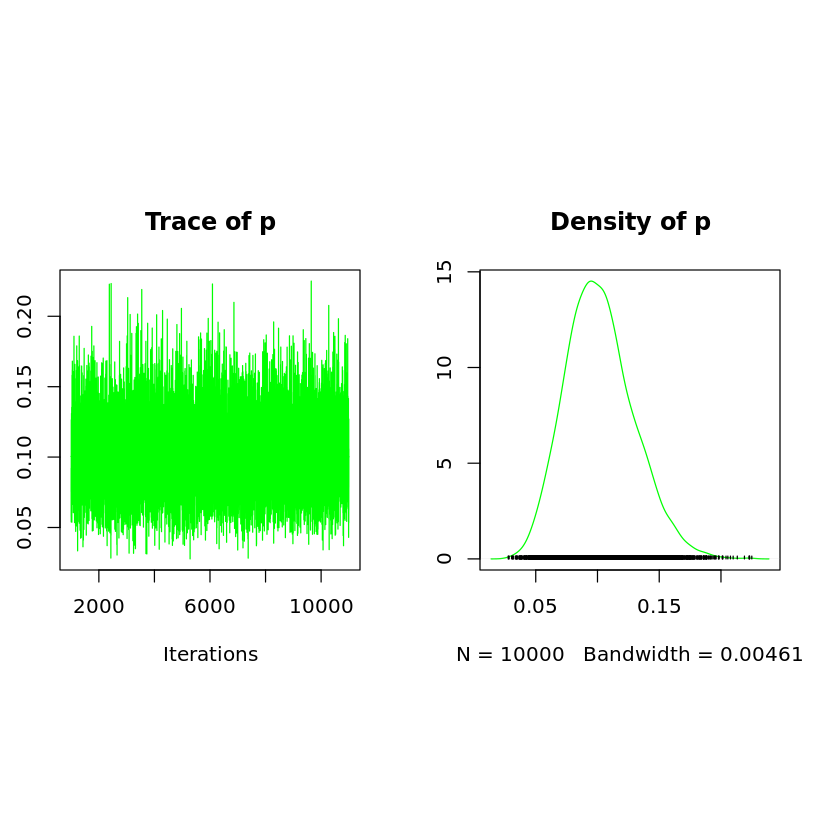

In [36]:
#creates an r object to represent the model and the data it is applied to.
jm <- jags.model('ex6.bug',data)
#This initates the burn in period
update(jm,1000)
# This tells the code to sample from the distributions provided with markov chains in order to calculat lambda.
# The sampling is done 10000 times with no thinning.
chain <- coda.samples(model = jm, variable.names = c("p"), n.iter=10000)
print(summary(chain))

par(pin = c(2.5,2.5))
plot(chain, col = 'green')

cat('The plot on the left shows how p changes as it is sampled from the inputed distributions. The plot on the right shows the probability density distribution of the p values sampled. This is the posterior distribution of the parameter.')

cat('\n\nAs provided by the chain summary:\n',
    'The mean is, 0.1018693\n',
    'The variance is', 0.0277073^2,'\n',
    'The 95% confidence interval goes from, 0.05434 to 0.16224')


The p value with the highest frequency is a bayseian estimator of the p value. This is:  0.0975

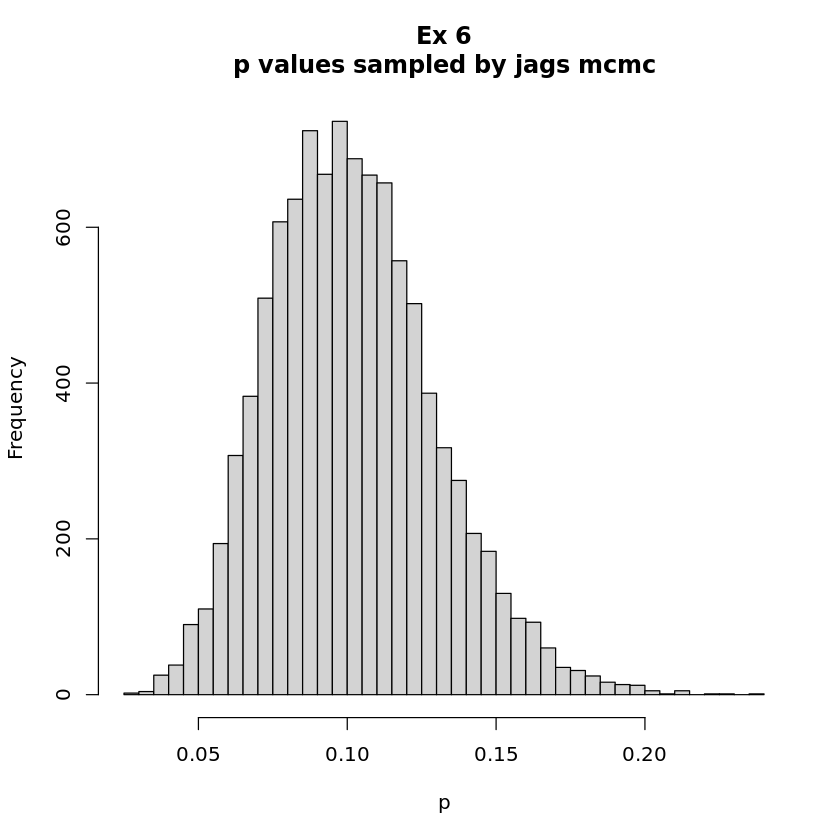

In [35]:
chain.df <- as.data.frame( as.mcmc(chain) )
plt <- hist(chain.df$p, breaks = 70, main = 'Ex 6\np values sampled by jags mcmc', xlab = 'p')

cat('\nThe p value with the highest frequency is a bayseian estimator of the p value. This is: ',plt$mids[which.max(plt$counts)])